In [39]:
import numpy as np
import pandas as pd
import sympy as S
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
mpl.style.use('seaborn-darkgrid')
mpl.rcParams.update({'font.size': 18})

In [41]:
pd.options.display.max_rows = 10

## Maximum A-Posteriori

We saw with maximum likelihood estimation how we could use the
principle of maximum likelihood to derive a formula of the data that
would estimate the underlying parameters (say, $\theta$). Under that
method, the parameter was fixed, but unknown. If we change our
perspective slightly and consider the underlying parameter as a random
variable in its own right, this leads to additional flexibility in
estimation.  This method is the simplest of the family of Bayesian
statistical methods and is most closely related to maximum likelihood
estimation. It is very popular in communications and signal processing
and is the backbone of many important algorithms in those areas.

Given that the parameter $\theta$ is also a random variable, it has a
joint distribution with the other random variables, say,
$f(x,\theta)$.  Bayes' theorem gives the following:

$$
\mathbb{P}(\theta|x) = \frac{\mathbb{P}(x|\theta)\mathbb{P}(\theta)}{\mathbb{P}(x)}
$$

 The $\mathbb{P}(x|\theta)$ term is the usual likelihood term we have
seen before. The term in the denominator is *prior* probability of the data $x$
and it explicitly makes a very powerful claim: even before collecting or
processing any data,  we know what the probability of that data is.  The $\mathbb{P}(\theta)$ is the prior probability of the
parameter. In other words, regardless of the data that is collected, this is
the probability of the parameter itself.

In a particular application, whether or not you feel justified making these
claims is something that you have to reconcile for yourself and the problem at
hand.  There are many persuasive  philosophical arguments one way or the other,
but the main thing to keep in mind when applying any method is whether or not
the assumptions are reasonable for the problem at hand. 

However, for now, let's just assume that we somehow have $\mathbb{P}(\theta)$
and the next step is the maximizing of this expression over the $\theta$.
Whatever results from that maximization is the maximum a-posteriori (MAP)
estimator for $\theta$. Because the maximization takes place with respect to
$\theta$ and not $x$, we can ignore the $\mathbb{P}(x)$ part. To make things
concrete, let us return to our original coin flipping problem.  From our
earlier analysis, we know that the likelihood function for this problem is
the following:

$$
\ell(\theta) := \theta^k (1-\theta)^{ (n-k) }
$$

 where the probability of the coin coming up heads is $\theta$. The
next step is the prior probability, $\mathbb{P}(\theta)$. For this example, we
will choose the $\beta(6,6)$ distribution (shown in the top left panel of
[Figure](#fig:MAP_001)). The $\beta$ family of distributions is a gold mine
because it allows for a wide variety of distributions using few input
parameters. Now that we have all the ingredients, we turn to maximizing the
posterior function, $\mathbb{P}(\theta|x)$. Because the logarithm is convex, we
can use it to make the maximization process easier by converting the product to
a sum without changing the extrema that we are looking for. Thus, we prefer the
to work with the logarithm of $\mathbb{P}(\theta|x)$ as in the following.

$$
\mathcal{L} := \log \mathbb{P}(\theta|x) =  \log \ell(\theta) + \log\mathbb{P}(\theta) - \log\mathbb{P}(x)
$$

 This is tedious to do by hand and therefore an excellent job
for Sympy.

In [42]:
from sympy import stats as st
from sympy.abc import p, k, n

# setup objective function using sympy.log
obj = S.expand_log(
    S.log(p**k * (1 - p)**(n - k) * st.density(st.Beta('p', 6, 6))(p)))

# use calculus to maximize objective
sol = S.solve(S.simplify(S.diff(obj, p)), p)[0]

sol

(k + 5)/(n + 10)

 which means that our MAP estimator of $\theta$ is the following:

$$
\hat{\theta}_{MAP} = \frac{k+5}{n+10}
$$

 where $k$ is the number of heads in the sample. This is obviously a
biased estimator of $\theta$,

$$
\mathbb{E}(\hat{\theta}_{MAP}) = \frac{5+n \theta}{10 +n} \neq \theta
$$

 But is this bias *bad*? Why would anyone want a biased estimator?
Remember that we constructed this entire estimator using the idea of the prior
probability of $\mathbb{P}(\theta)$ which *favors* (biases!) the estimate
according to the prior.  For example, if $\theta=1/2$, the MAP estimator
evaluates to $\hat{\theta}_{MAP}=1/2$. No bias there! This is because the peak
of the prior probability is at $\theta=1/2$. 

To compute the corresponding variance for this estimator, we need this
intermediate result,

$$
\mathbb{E}(\hat{\theta}_{MAP}^2) =\frac{25 +10 n \theta + n \theta((n-1) p+1)}{(10+n)^2}
$$

 which gives the following variance,

$$
\mathbb{V}(\hat{\theta}_{MAP}) = \frac{n (1-\theta) \theta}{(n+10)^2}
$$

Let's pause and compare this to our previous maximum likelihood (ML) estimator
shown below:

$$
\hat{\theta}_{ML} = \frac{1}{n} \sum_{i=1}^n X_i =  \frac{k}{n}
$$

 As we discussed before, the ML-estimator is unbiased with the
following variance.

$$
\mathbb{V}(\hat{\theta}_{ML}) = \frac{\theta(1-\theta)}{n}
$$

 How does this variance compare to that of the MAP? The ratio of the
two is the following:

$$
\frac{\mathbb{V}(\hat{\theta}_{MAP})}{\mathbb{V}(\hat{\theta}_{ML})}=\frac{n^2}{(n+10)^2}
$$

  This ratio shows that the variance for the MAP-estimator is smaller
than that of the the ML-estimator. This is payoff for having a biased
MAP-estimator --- it requires fewer samples to estimate if the underlying
parameter is consistent with the prior probability. If not, then it will take
more samples to pull the estimator away from the bias. In the limit as $n
\rightarrow \infty$, the ratio goes to one.  This means that the benefit of the
reduced variance vanishes with enough samples. 

The above discussion admits a level of arbitrariness via the prior
distribution. We don't have to choose just one prior, however. The
following shows how we can use the previous posterior distribution as the
prior for the next posterior distribution,

$$
\mathbb{P}(\theta|x_{k+1}) = \frac{\mathbb{P}(x_{k+1}|\theta)\mathbb{P}(\theta|x_k)}{\mathbb{P}(x_{k+1})}
$$

 This is a very different strategy because we are using every data
sample $x_k$ as a parameter for the posterior distribution instead of lumping
all the samples together in a summation (this is where we got the $k$
term in the prior case). This case is much harder to analyze because now
every incremental posterior distribution is itself a random function because of
the injection of the $x$ random variable. On the other hand, this is more in
line with more general Bayesian methods because it is clear that the output of
this estimation process is a posterior distribution function, not just a single
parameter estimate. 

[Figure](#fig:MAP_001) illustrates this method. The graph
in the top row, far left shows the prior probability ($\beta(6,6)$) and the dot
on the top shows the most recent MAP-estimate for $\theta$. Thus, before we
obtain any data, the peak of the prior probability  is the estimate. The next
graph to right shows the effect of $x_0=0$ on the incremental prior
probability.  Note that the estimate has barely moved to the left. This is
because the influence of the data has not caused the prior probability to drift
away from the original $\beta(6,6)$-distribution.  The first two rows of the
figure all have $x_k=0$ just to illustrate how far left the original prior
probability can be moved by those data. The dots on the tops of the sub-graphs
show how the MAP estimate changes frame-by-frame as more data is incorporated.
The remaining graphs, proceeding top-down, left-to-right show the incremental
change in the prior probability for $x_k=1$.  Again, this shows how far to the right 
the estimate can be pulled from where it started. For this example, there
are an equal number of $x_k=0$ and $x_k=1$ data, which corresponds 
to $\theta=1/2$.  

<!-- dom:FIGURE: [fig-statistics/MAP_001.png, width=500 frac=0.95] The prior probability is the $\beta(6,6)$ distribution shown in the top left panel. The dots near the peaks of each of the subgraphs indicate the MAP estimate at that frame <div id="fig:MAP_001"></div> -->
<!-- begin figure -->
<div id="fig:MAP_001"></div>

<p>The prior probability is the $\beta(6,6)$ distribution shown in the top left panel. The dots near the peaks of each of the subgraphs indicate the MAP estimate at that frame</p>
<img src="fig-statistics/MAP_001.png" width=500>

<!-- end figure -->


**Programming Tip.**

Although the IPython Notebook accompanying this section has the full source
code, the following is a quick paraphrase of how [Figure](#fig:MAP_001) was
constructed. The first step is to recursively create the
posteriors from the data. Note the example data is sorted
to make the progression easy to see as a sequence.

In [66]:
from sympy.abc import p, x
from sympy.stats import density, Beta, Bernoulli

prior = density(Beta('p', 6.,6.))(p)

likelihood = density(Bernoulli('x', p))(x)

data = (0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1)

posteriors = [prior]
for xi in data:
    posteriors.append(posteriors[-1] * likelihood.subs(x, xi))

 With the posteriors in hand, the next step 
is to compute the peak values at each frame using the
`fminbound` function from Scipy's  `optimize` module.

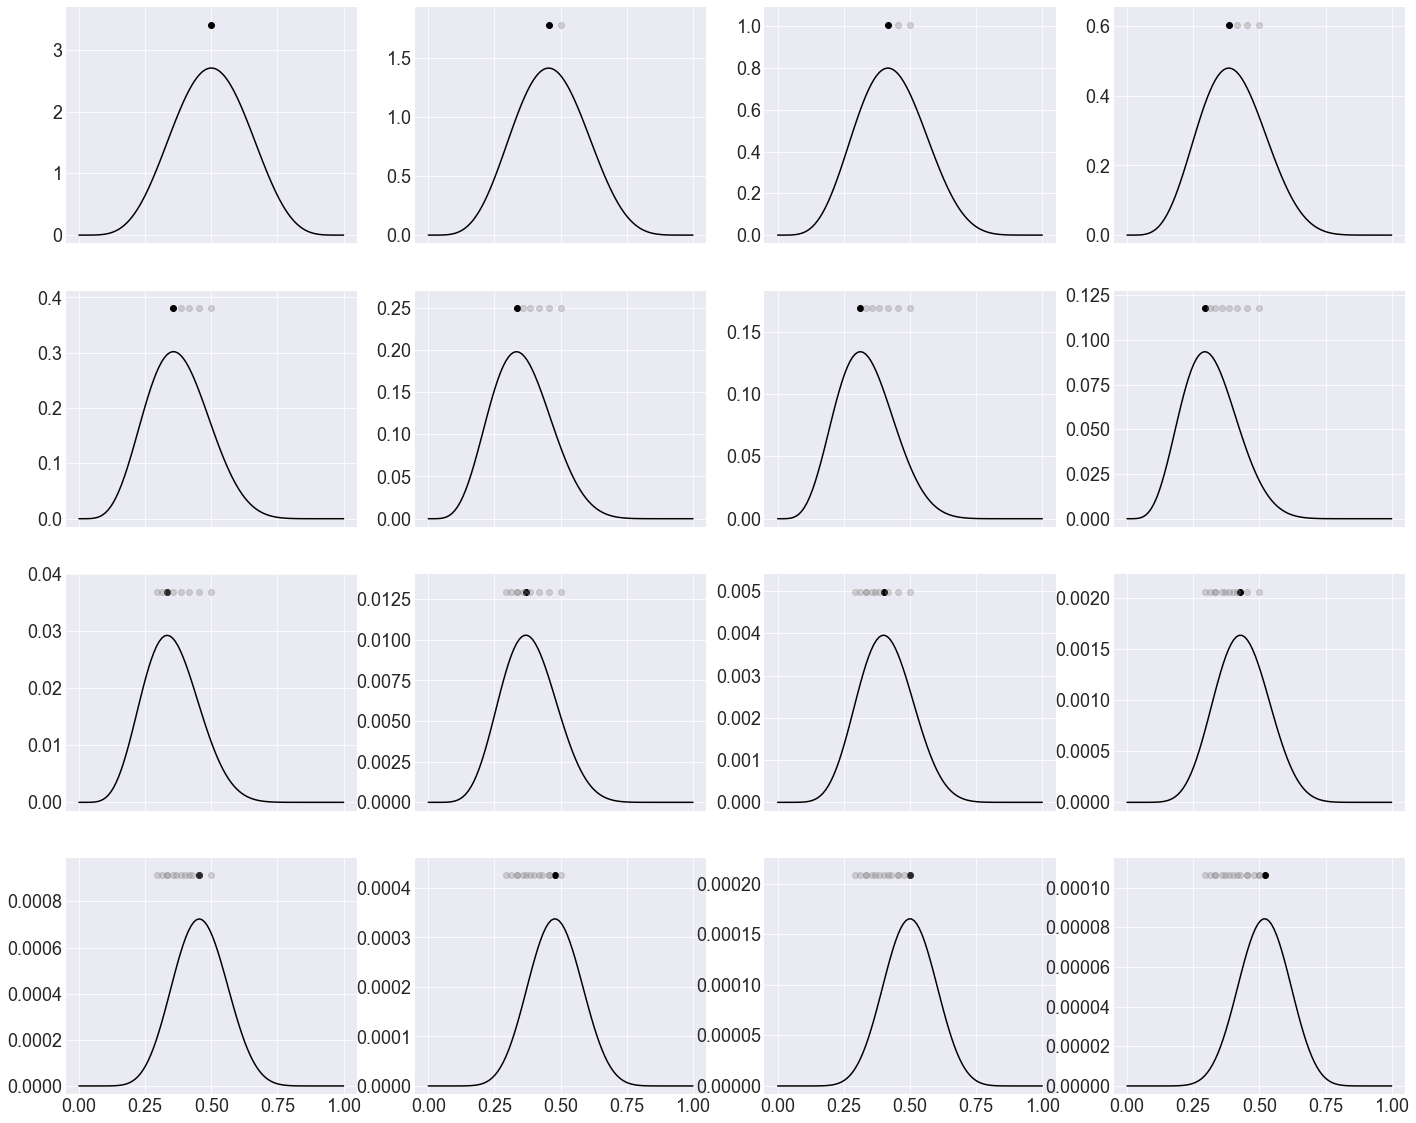

In [67]:
from scipy.optimize import fminbound

fig, ax = plt.subplots(4,4,sharex=True, figsize=(4*6,4*5))

pvals = np.linspace(0, 1, 100)
mxvals = []

for ax_i, posteriors_i in zip(ax.flat, posteriors):
    ax_i.plot(pvals, sympy.lambdify(p, posteriors_i)(pvals), color='k')
    mxval = fminbound(sympy.lambdify(p, -posteriors_i), 0, 1)
    mxvals.append(mxval)

    h = ax_i.axis()[-1]

    ax_i.axis(ymax=h * 1.3)
    ax_i.plot(mxvals[-1], h * 1.2, 'ok')
    ax_i.plot(
        mxvals[:-1], [h * 1.2] * len(mxvals[:-1]), 'o', color='gray', alpha=.3)

The [Figure](#fig:MAP_002) is the same as [Figure](#fig:MAP_001) except that
the initial prior probability is the $\beta(1.3,1.3)$-distribution, which has a
wider lobe that the $\beta(6,6)$-distribution. As shown in the figure, this
prior has the ability to be swayed more violently one way or the other based on
the $x_k$ data that is incorporated. This means that it can more quickly adapt
to data that is not so consistent with the initial prior and thus does not
require a large amount of data in order to *unlearn* the prior probability.
Depending on the application, the ability to unlearn the prior probability or
stick with it is a design problem for the analyst. In this example, because the
data are representative of a $\theta=1/2$ parameter, both priors eventually
settle on an estimated posterior that is about the same. However, if this had
not been the case ($\theta \neq 1/2$), then the second prior 
would have produced a better estimate for the same amount of data [^IPyNote]. 

[^IPyNote]: The IPython Notebook corresponding to this
chapter contains the source code sot hat you can try different
combinations of priors and data values.

<!-- dom:FIGURE: [fig-statistics/MAP_002.png, width=500 frac=0.95] For this example, the prior probability is the $\beta(1.3,1.3)$ distribution, which has a wider main lobe than the $\beta(6,6)$ distribution. The dots near the peaks of each of the subgraphs indicate the MAP estimate at that frame. <div id="fig:MAP_002"></div> -->
<!-- begin figure -->
<div id="fig:MAP_002"></div>

<p>For this example, the prior probability is the $\beta(1.3,1.3)$ distribution, which has a wider main lobe than the $\beta(6,6)$ distribution. The dots near the peaks of each of the subgraphs indicate the MAP estimate at that frame.</p>
<img src="fig-statistics/MAP_002.png" width=500>

<!-- end figure -->


Because we have the entire posterior density available, we can compute
something that is closely related to the confidence interval we discussed
earlier, except in this situation, given the Bayesian interpretation, it is
called a *credible interval* or *credible set*.  The idea is that we want to
find a symmetric interval around the peak that accounts for 95% (say) of the
posterior density. This means that we can then say the probability that the
estimated parameter is within the credible interval is 95%. The computation
requires significant numerical processing because even though we have the
posterior density in hand, it is hard to integrate analytically and requires
numerical quadrature (see Scipy's `integrate` module).  [Figure](#fig:MAP_003)
shows extent of the interval and the shaded region under the posterior density
that accounts for 95%.

<!-- dom:FIGURE: [fig-statistics/MAP_003.png, width=500 frac=0.75] The *credible interval* in Bayesian maximum a-posteriori is the interval corresponding to the shaded region in the posterior density.  <div id="fig:MAP_003"></div> -->
<!-- begin figure -->
<div id="fig:MAP_003"></div>

<p>The <em>credible interval</em> in Bayesian maximum a-posteriori is the interval corresponding to the shaded region in the posterior density.</p>
<img src="fig-statistics/MAP_003.png" width=500>

<!-- end figure -->

In [68]:
from sympy.abc import p, x
from sympy.stats import density, Beta, Bernoulli

prior = density(Beta('p', 1.3, 1.3))(p)

likelihood = density(Bernoulli('x', p))(x)

data = (0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1)

posteriors = [prior]
for xi in data:
    posteriors.append(posteriors[-1] * likelihood.subs(x, xi))

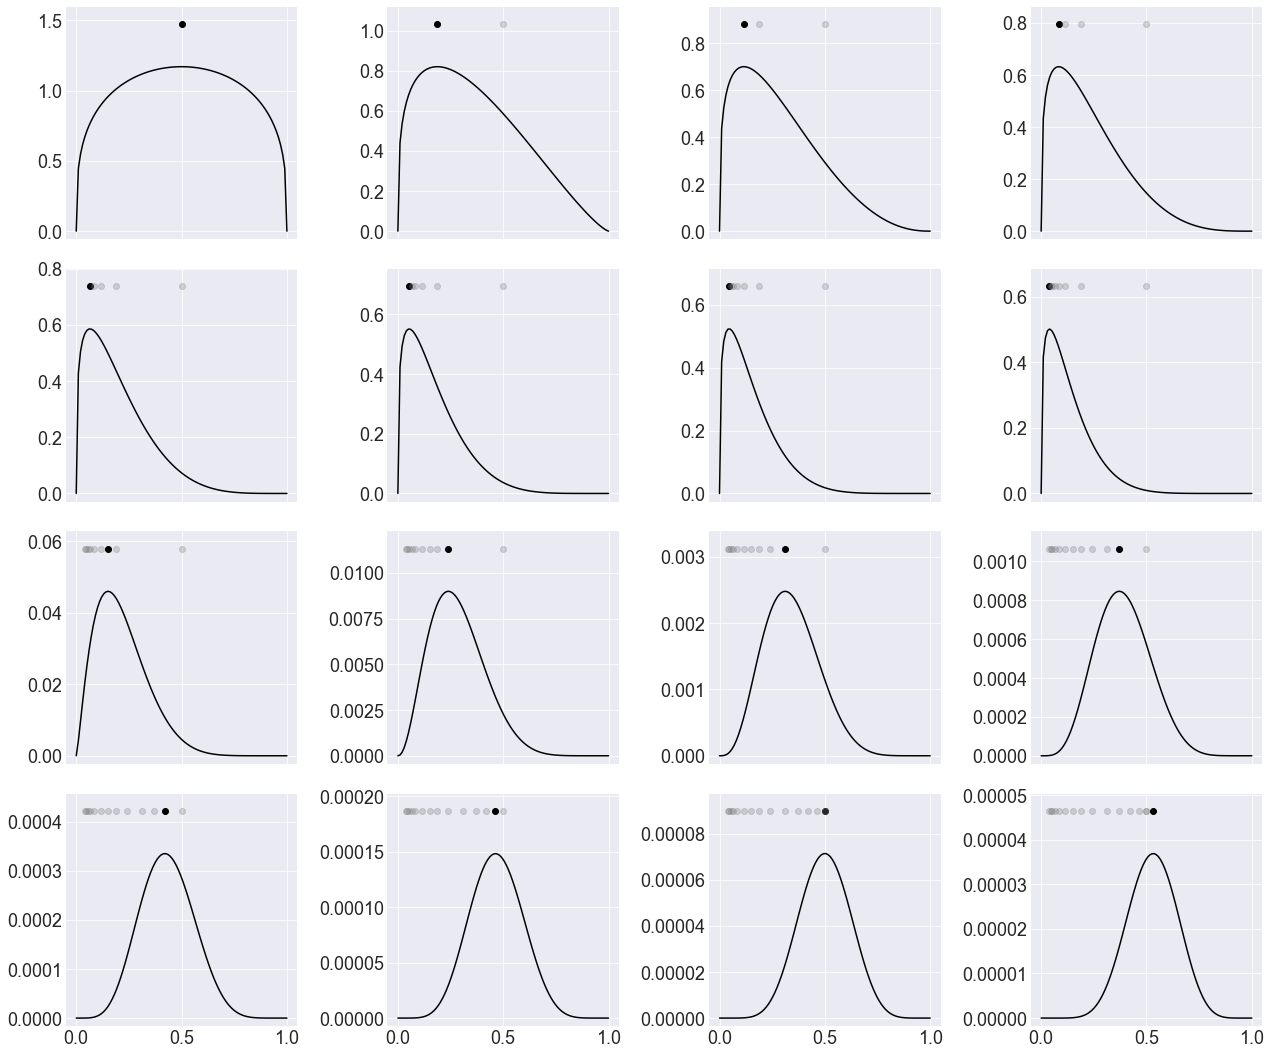

In [69]:
from scipy.optimize import fminbound

fig, ax = plt.subplots(4,4,sharex=True, figsize=(3*6,3*5))

pvals = np.linspace(0, 1, 100)
mxvals = []

for ax_i, posteriors_i in zip(ax.flat, posteriors):
    ax_i.plot(pvals, sympy.lambdify(p, posteriors_i)(pvals), color='k')
    mxval = fminbound(sympy.lambdify(p, -posteriors_i), 0, 1)
    mxvals.append(mxval)

    h = ax_i.axis()[-1]

    ax_i.axis(ymax=h * 1.3)
    ax_i.plot(mxvals[-1], h * 1.2, 'ok')
    ax_i.plot(
        mxvals[:-1], [h * 1.2] * len(mxvals[:-1]), 'o', color='gray', alpha=.3)

    fig.tight_layout()

In [71]:
import pymc3 as pm

In [73]:
data = (0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1)

In [103]:
model = pm.Model()

with model:
    #theta = pm.Beta('theta', alpha=6., beta=6.)
    theta = pm.Uniform('theta',lower=0,upper=1)
    likelihood = pm.Bernoulli('likelihood', p=theta, observed=data)

In [104]:
map_estimate = pm.find_MAP(model=model)

logp = -10.397, ||grad|| = 0.5: 100%|██████████| 6/6 [00:00<00:00, 2155.90it/s]


In [105]:
map_estimate

{'theta_interval__': array(0.13353139), 'theta': array(0.53333333)}

In [106]:
with model:
    # draw 500 posterior samples
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/hvribeiro/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████| 1000/1000 [00:00<00:00, 1882.05it/s]


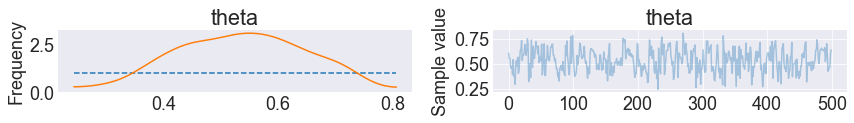

In [107]:
pm.traceplot(trace,combined=True, priors=[theta.distribution]);

In [108]:
pm.summary(trace)


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.534            0.113            0.007            [0.340, 0.752]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.317          0.451          0.537          0.619          0.732



In [158]:
def two_lines(x):
    if x < 5:
        return 3*x
    else:
        return 10+x

x = np.linspace(0,10,100)

In [162]:
y = np.asarray([two_lines(xi)+np.random.randn() for xi in x])

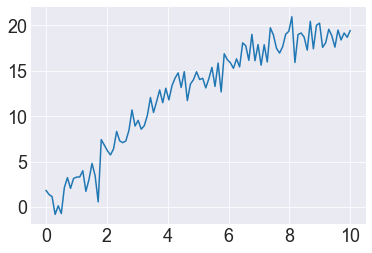

In [163]:
plt.plot(x,y)

In [165]:
model = pm.Model()

with model:
    #theta = pm.Beta('theta', alpha=6., beta=6.)
    a1 = pm.Uniform('a1',lower=-10,upper=10)
    a2 = pm.Uniform('a2',lower=-10,upper=10)
    b2 = pm.Uniform('b2',lower=-10,upper=10)
    xc = pm.Uniform('xc',lower=0,upper=10)
    sigma = pm.HalfNormal('sigma',sd=2)
    
    a = pm.math.switch(x<xc, a1, a2)
    b = pm.math.switch(x<xc, 1, b2)
    
    mu = b+a*x
    
    y_obs = pm.Normal('y_obs',mu=mu,sd=sigma,observed=y)

In [166]:
map_estimate = pm.find_MAP(model=model,)

logp = -185.3, ||grad|| = 0.011123: 100%|██████████| 42/42 [00:00<00:00, 1935.34it/s]  


In [167]:
map_estimate

{'a1_interval__': array(0.56325939),
 'a2_interval__': array(0.21253385),
 'b2_interval__': array(3.48292001),
 'xc_interval__': array(0.),
 'sigma_log__': array(0.30736151),
 'a1': array(2.7441273),
 'a2': array(1.05868714),
 'b2': array(9.4039573),
 'xc': array(5.),
 'sigma': array(1.35983248)}

In [168]:
with model:
    # draw 500 posterior samples
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/hvribeiro/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████| 1000/1000 [01:59<00:00,  8.34it/s]/home/hvribeiro/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:459: UserWarning: Chain 0 reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
  'reparameterize.' % self._chain_id)
/home/hvribeiro/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.8944320469928196, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))



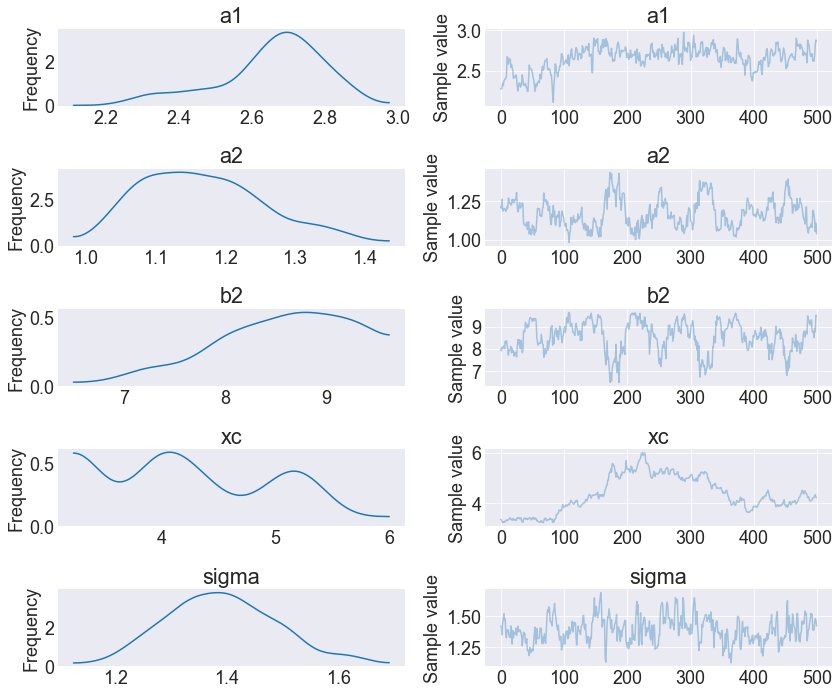

In [169]:
pm.traceplot(trace,combined=True);

In [170]:
pm.summary(trace)


a1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.653            0.147            0.014            [2.332, 2.902]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.301          2.591          2.680          2.753          2.878


a2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.170            0.091            0.008            [1.020, 1.349]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.026          1.099          1.158          1.227          1.370


b2:

  Mean             SD               MC Error         95% HPD interval
  ----------------------------------

## Robust Statistics

We considered Maximum Likelihood Estimation (MLE) and Maximum A-Posteriori
(MAP) estimation and in each case we started out with a probability density
function of some kind and we further assumed that the samples were identically
distributed and independent (iid). The idea behind robust statistics
[[maronna2006robust]](#maronna2006robust) is to construct estimators that can survive the
weakening of either or both of these assumptions. More concretely, suppose you
have a model that works great except for a few outliers. The temptation is to
just ignore the outliers and proceed. Robust estimation methods provide a
disciplined way to handle outliers without cherry-picking data that works for
your favored model.

### The Notion of Location

The first notion we need is *location*, which is  a generalization of the idea
of *central value*. Typically, we just use an estimate of the mean for this,
but we will see later why this could be a bad idea.  The general idea of
location satisfies the following requirements Let $X$ be a random variable with
distribution $F$, and let $\theta(X)$ be some descriptive measure of $F$. Then
$\theta(X)$ is said to be a measure of *location* if for any constants *a* and
*b*, we have the following:

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\theta(X+b)  = \theta(X) +b 
\label{_auto1} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} \
\theta(-X)   = -\theta(X)  
\label{_auto2} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation} \
X \ge 0 \Rightarrow \theta(X)  \ge 0  
\label{_auto3} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation} \
\theta(a X) = a\theta(X)
\label{_auto4} \tag{4}
\end{equation}
$$

 The first condition is called *location equivariance* (or *shift-invariance* in
signal processing lingo). The fourth condition is called *scale equivariance*,
which means that the units that $X$ is measured in should not effect the value
of the  location estimator.  These requirements capture the intuition of
*centrality* of a distribution, or where most of the
probability mass is located.

For example, the sample mean estimator is $ \hat{\mu}=\frac{1}{n}\sum X_i $. The first
requirement is obviously satisfied as $ \hat{\mu}=\frac{1}{n}\sum (X_i+b) = b +
\frac{1}{n}\sum X_i =b+\hat{\mu}$. Let us consider the second requirement:$
\hat{\mu}=\frac{1}{n}\sum -X_i = -\hat{\mu}$. Finally, the last requirement is
satisfied with $ \hat{\mu}=\frac{1}{n}\sum a X_i =a \hat{\mu}$.

### Robust Estimation and Contamination

Now that we have the generalized location of centrality embodied in the
*location* parameter, what can we do with it?  Previously, we assumed that our samples
were all identically distributed. The key idea is that the samples might be
actually coming from a *single* distribution that is contaminated by another nearby
distribution, as in the following:

$$
F(X) = \epsilon G(X) + (1-\epsilon)H(X)
$$

 where $ \epsilon $ randomly toggles between zero and one. This means
that our data samples $\lbrace X_i \rbrace$ actually derived from two separate
distributions, $ G(X) $ and $ H(X) $. We just don't know how they are mixed
together. What we really want  is an estimator  that captures the location of $
G(X) $ in the face of random intermittent contamination by $ H(X)$.  For
example, it may be that this contamination is responsible for the outliers in a
model that otherwise works well with the dominant $F$ distribution. It can get
even worse than that because we don't know that there is only one contaminating
$H(X)$ distribution out there. There may be a whole family of distributions
that are contaminating $G(X)$. This means that whatever estimators we construct
have to be derived from a more generalized family of distributions instead of
from a single distribution,  as the maximum-likelihood method assumes.  This is
what makes robust estimation so difficult --- it has to deal with *spaces* of
function distributions instead of parameters from a particular probability
distribution.

### Generalized Maximum Likelihood Estimators

M-estimators are generalized maximum likelihood estimators. Recall that for
maximum likelihood, we want to maximize the likelihood function as in the
following:

$$
L_{\mu}(x_i) = \prod f_0(x_i-\mu)
$$

 and then to find the estimator $\hat{\mu}$ so that

$$
\hat{\mu} = \arg \max_{\mu} L_{\mu}(x_i)
$$

  So far, everything is the same as our usual maximum-likelihood
derivation except for the fact that we don't assume a specific $f_0$ as the
distribution of the $\lbrace X_i\rbrace$. Making the definition of

$$
\rho = -\log f_0
$$

 we obtain the more convenient form of the likelihood product and the
optimal $\hat{\mu}$ as

$$
\hat{\mu} = \arg \min_{\mu} \sum \rho(x_i-\mu)
$$

 If $\rho$ is differentiable, then differentiating  this with respect
to $\mu$ gives

<!-- Equation labels as ordinary links -->
<div id="eq:muhat"></div>

$$
\begin{equation}
\sum \psi(x_i-\hat{\mu}) = 0 
\label{eq:muhat} \tag{5}
\end{equation}
$$

 with $\psi = \rho^\prime$, the first derivative of $\rho$ , and for technical reasons we will assume that
$\psi$ is increasing. So far, it looks like we just pushed some definitions
around, but the key idea is we want to consider general $\rho$ functions that
may not be maximum likelihood estimators for *any* distribution. Thus, our
focus is now on uncovering the nature of $\hat{\mu}$.

### Distribution of M-estimates

For a given distribution $F$, we define $\mu_0=\mu(F)$ as the solution to the
following

$$
\mathbb{E}_F(\psi(x-\mu_0))= 0
$$

 It is technical to show, but it turns out that $\hat{\mu} \sim
\mathcal{N}(\mu_0,\frac{v}{n})$ with

$$
v = \frac{\mathbb{E}_F(\psi(x-\mu_0)^2)}{(\mathbb{E}_F(\psi^\prime(x-\mu_0)))^2}
$$

 Thus, we can say that $\hat{\mu}$ is asymptotically normal with asymptotic
value $\mu_0$ and asymptotic variance $v$. This leads to the efficiency ratio
which is defined as  the following:

$$
\texttt{Eff}(\hat{\mu})= \frac{v_0}{v}
$$

 where $v_0$ is the asymptotic variance of the MLE and measures how
near $\hat{\mu}$ is to the optimum. In other words, this provides a sense of
how much outlier contamination costs in terms of samples. For example, if for
two estimates with asymptotic variances $v_1$ and $v_2$, we have $v_1=3v_2$,
then first estimate requires three times as many observations to obtain the
same variance as the second. Furthermore, for the sample mean (i.e.,
$\hat{\mu}=\frac{1}{n} \sum X_i$) with $F=\mathcal{N}$, we have $\rho=x^2/2$
and $\psi=x$ and also $\psi'=1$. Thus, we have $v=\mathbb{V}(x)$.
Alternatively, using the sample median as the estimator for the location, we
have $v=1/(4 f(\mu_0)^2)$.  Thus, if we have $F=\mathcal{N}(0,1)$, for the
sample median, we obtain $v={2\pi}/{4} \approx 1.571$. This means that the
sample median takes approximately 1.6 times as many samples to obtain the same
variance for the location as the sample mean. The sample median is 
far more immune to the effects of outliers than the sample mean, so this 
gives a sense of how much this robustness costs in samples.

** M-Estimates as Weighted Means.** One way to think about M-estimates is a
weighted means. Operationally, this
means that we want weight functions that can circumscribe the
influence of the individual data points, but, when taken as a whole,
still provide good estimated parameters. Most of the time, we have $\psi(0)=0$ and $\psi'(0)$ exists so
that $\psi$ is approximately linear at the origin. Using the following
definition:

$$
W(x)  =  \begin{cases}
                \psi(x)/x & \text{if} \: x \neq 0 \\\
                \psi'(x)  & \text{if} \: x =0 
            \end{cases}
$$

 We can write our Equation ref{eq:muhat} as follows:

<!-- Equation labels as ordinary links -->
<div id="eq:Wmuhat"></div>

$$
\begin{equation}
\sum W(x_i-\hat{\mu})(x_i-\hat{\mu}) = 0 
\label{eq:Wmuhat} \tag{6}
\end{equation}
$$

 Solving this for $\hat{\mu} $ yields the following,

$$
\hat{\mu} = \frac{\sum w_{i} x_i}{\sum w_{i}}
$$

 where $w_{i}=W(x_i-\hat{\mu})$. This is not practically useful
because the $w_i$ contains $\hat{\mu}$, which is what we are trying to solve
for. The question that remains is how to pick the $\psi$ functions. This is
still an open question, but the Huber functions are a well-studied choice.

### Huber Functions

The family of Huber functions is defined by the following:

$$
\rho_k(x ) = \begin{cases}
                x^2         & \mbox{if }  |x|\leq k \\\
                2 k |x|-k^2 & \mbox{if }  |x| >  k
                \end{cases}
$$

 with corresponding derivatives $2\psi_k(x)$ with

$$
\psi_k(x ) = \begin{cases}
                x              & \mbox{if } \: |x| \leq k \\\
                \text{sgn}(x)k & \mbox{if } \: |x| >  k
                \end{cases}
$$

 where the limiting cases $k \rightarrow \infty$ and $k \rightarrow 0$
correspond to the mean and median, respectively. To see this, take
$\psi_{\infty} = x$ and therefore $W(x) = 1$ and thus the defining Equation
ref{eq:Wmuhat} results in

$$
\sum_{i=1}^{n} (x_i-\hat{\mu}) = 0
$$

 and then solving this leads to $\hat{\mu} = \frac{1}{n}\sum x_i$.
Note that choosing $k=0$ leads to  the sample median, but that is not so
straightforward to solve for. Nonetheless, Huber functions provide a way
to move between two extremes of estimators for location (namely, 
the mean vs. the median) with a tunable parameter $k$. 
The $W$ function corresponding to Huber's $\psi$ is the following:

$$
W_k(x) = \min\Big{\lbrace} 1, \frac{k}{|x|} \Big{\rbrace}
$$

 [Figure](#fig:Robust_Statistics_0001) shows the Huber weight
function for $k=2$ with some sample points. The idea is that the computed
location, $\hat{\mu}$ is computed from Equation ref{eq:Wmuhat} to lie somewhere
in the middle of the weight function so that those terms (i.e., *insiders*)
have their values fully reflected in the location estimate. The black circles
are the *outliers* that have their values attenuated by the weight function so
that only a fraction of their presence is represented in the location estimate.

<!-- dom:FIGURE: [fig-statistics/Robust_Statistics_0001.png, width=500 frac=0.80] This shows the Huber weight function, $W_2(x)$ and some cartoon data points that are insiders or outsiders as far as the robust location estimate is concerned.  <div id="fig:Robust_Statistics_0001"></div> -->
<!-- begin figure -->
<div id="fig:Robust_Statistics_0001"></div>

<p>This shows the Huber weight function, $W_2(x)$ and some cartoon data points that are insiders or outsiders as far as the robust location estimate is concerned.</p>
<img src="fig-statistics/Robust_Statistics_0001.png" width=500>

<!-- end figure -->


### Breakdown Point

So far, our discussion of robustness has been very abstract.  A more concrete
concept of robustness comes from the breakdown point.  In the simplest terms,
the breakdown point describes what happens when a single data point in an
estimator is changed in the most damaging way possible. For example, suppose we
have the sample mean, $\hat{\mu}=\sum x_i/n$, and we take one of the $x_i$
points to be infinite. What happens to this estimator? It also goes infinite.
This means that the breakdown point of the estimator is 0%. On the other hand,
the median has a breakdown point of 50%, meaning that half of the data for
computing the median could go infinite without affecting the median value. The median
is a *rank* statistic that cares more about the relative ranking of the data
than the values of the data, which explains its robustness.

The simpliest but still formal way to express the breakdown point is to
take $n$ data points, $\mathcal{D} = \lbrace (x_i,y_i) \rbrace$. Suppose $T$
is a regression estimator that yields a vector of regression coefficients,
$\boldsymbol{\theta}$,

$$
T(\mathcal{D}) = \boldsymbol{\theta}
$$

 Likewise, consider all possible corrupted samples of the data
$\mathcal{D}^\prime$. The maximum *bias* caused by this contamination is
the following:

$$
\texttt{bias}_{m} = \sup_{\mathcal{D}^\prime} \Vert T(\mathcal{D^\prime})-T(\mathcal{D}) \Vert
$$

 where the $\sup$ sweeps over all possible sets of $m$ contaminated samples.
Using this, the breakdown point is defined as the following:

$$
\epsilon_m = \min \Big\lbrace \frac{m}{n} \colon \texttt{bias}_{m} \rightarrow \infty \Big\rbrace
$$

 For example, in our least-squares regression, even one point at
infinity causes an infinite $T$. Thus, for least-squares regression,
$\epsilon_m=1/n$. In the limit $n \rightarrow \infty$, we have $\epsilon_m
\rightarrow 0$.

### Estimating Scale

In robust statistics, the concept of *scale* refers to a measure of the
dispersion of the data. Usually, we use the
estimated standard deviation for this, but this has a terrible breakdown point.
Even more troubling, in order to get a good estimate of location, we have to
either somehow know the scale ahead of time, or jointly estimate it. None of
these methods have easy-to-compute closed form solutions and must be computed
numerically.

The most popular method for estimating scale is the *median absolute deviation*

$$
\texttt{MAD} = \texttt{Med} (\vert \mathbf{x} - \texttt{Med}(\mathbf{x})\vert)
$$

 In words, take the median of the data $\mathbf{x}$ and
then subtract that median from the data itself, and then take the median of the
absolute value of the result. Another good dispersion estimate is the *interquartile range*,

$$
\texttt{IQR} = x_{(n-m+1)} - x_{(n)}
$$

 where $m= [n/4]$. The $x_{(n)}$ notation means the $n^{th}$ data
element after the data have been sorted. Thus, in this notation,
$\texttt{max}(\mathbf{x})=x_{(n)}$. In the case where $x \sim
\mathcal{N}(\mu,\sigma^2)$, then $\texttt{MAD}$ and $\texttt{IQR}$ are constant
multiples of $\sigma$ such that the normalized $\texttt{MAD}$ is the following,

$$
\texttt{MADN}(x) = \frac{\texttt{MAD} }{0.675}
$$

  The number comes from the inverse CDF of the normal distribution
corresponding to the $0.75$ level. Given the complexity of the
calculations, *jointly* estimating both location and scale is a purely
numerical matter. Fortunately, the Statsmodels module has many of these
ready to use. Let's create some contaminated data in the following code,

In [171]:
import statsmodels.api as sm
from scipy import stats
data = np.hstack([stats.norm(10,1).rvs(10),stats.norm(0,1).rvs(100)])

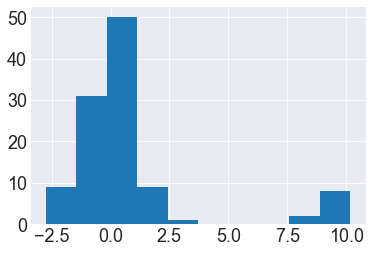

In [172]:
plt.hist(data);

In [174]:
np.mean(data),np.std(data)

(0.843585135841257, 2.912697851525753)

 These data correspond to our model of contamination that we started
this section with. As shown in the  histogram in [Figure](#fig:Robust_Statistics_0002), there are two normal distributions, one
centered neatly at zero, representing the majority of the samples, and another
coming less regularly from the normal distribution on the right. Notice that
the group of infrequent samples on the right separates the mean and median
estimates (vertical dotted and dashed lines).  In the absence of the
contaminating distribution on the right, the standard deviation for this data
should be close to one. However, the usual non-robust estimate for standard
deviation (`np.std`) comes out to approximately three.  Using the
$\texttt{MADN}$ estimator (`sm.robust.scale.mad(data)`) we obtain approximately
1.25. Thus, the robust estimate of dispersion is less moved by the presence of
the  contaminating distribution.

<!-- dom:FIGURE: [fig-statistics/Robust_Statistics_0002.png, width=500 frac=0.85] Histogram of sample data. Notice that the group of infrequent samples on the right separates the mean and median estimates indicated by the vertical lines.  <div id="fig:Robust_Statistics_0002"></div> -->
<!-- begin figure -->
<div id="fig:Robust_Statistics_0002"></div>

<p>Histogram of sample data. Notice that the group of infrequent samples on the right separates the mean and median estimates indicated by the vertical lines.</p>
<img src="fig-statistics/Robust_Statistics_0002.png" width=500>

<!-- end figure -->


The generalized maximum likelihood M-estimation extends to joint
scale and location estimation using Huber functions. For example,

In [175]:
huber = sm.robust.scale.Huber()
loc, scl = huber(data)

In [176]:
loc, scl

(array(0.16602937), array(1.21519443))

 which implements Huber's *proposal two* method of joint estimation of
location and scale. This kind of estimation is the key ingredient to robust
regression methods, many of which are implemented in Statsmodels in
`statsmodels.formula.api.rlm`. The corresponding documentation has more
information.

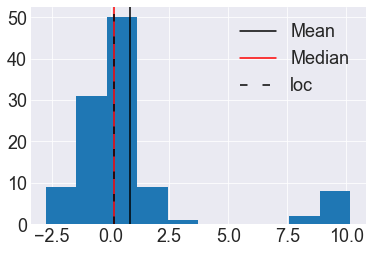

In [188]:
plt.hist(data);
plt.axvline(np.mean(data),color='k',label='Mean')
plt.axvline(np.median(data),color='red',label='Median')
plt.axvline(loc,color='black',label='loc',dashes=(5,10))

plt.legend()

## Bootstrapping

As we have seen, outside of some  toy problems, it can be very difficult  or
impossible to determine  the probability density distribution of the estimator
of some quantity. The idea behind the bootstrap is that we can use computation
to approximate  these functions which would otherwise be impossible to solve
for analytically. 

Let's start with a simple example. Suppose we have the following set of random
variables, $\lbrace X_1, X_2, \ldots, X_n \rbrace$ where each $X_k \sim F$. In
other words the samples are all drawn from the same unknown distribution $F$.
Having run the experiment, we thereby obtain the following sample set:

$$
\lbrace x_1, x_2, \ldots, x_n \rbrace
$$

 The sample mean is computed from this set as,

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
$$

 The next question is how close is the sample mean to the true mean,
$\theta = \mathbb{E}_F(X)$. Note that the second central moment of $X$ is as
follows:

$$
\mu_2(F) := \mathbb{E}_F (X^2)  - (\mathbb{E}_F (X))^2
$$

 The standard deviation of the sample mean, $\bar{x}$, given $n$
samples from an underlying distribution $F$, is the following:

$$
\sigma(F) = (\mu_2(F)/n)^{1/2}
$$

 Unfortunately, because we have only the set of samples $\lbrace x_1,
x_2, \ldots, x_n \rbrace$ and not $F$ itself, we cannot compute this and
instead must use the estimated standard error,

$$
\bar{\sigma} = (\bar{\mu}_2/n)^{1/2}
$$

 where $\bar{\mu}_2 = \sum (x_i -\bar{x})^2/(n-1) $, which is the
unbiased estimate of $\mu_2(F)$. However, that is not the only way to proceed.
Instead, we could replace $F$ by some estimate, $\hat{F}$ obtained as a
piecewise function of $\lbrace x_1, x_2, \ldots, x_n \rbrace$ by placing
probability mass $1/n$ on each $x_i$. With that in place, we can compute the
estimated standard error as the following:

$$
\hat{\sigma}_B  = (\mu_2(\hat{F})/n)^{1/2}
$$

 which is called the *bootstrap estimate* of the standard error.
Unfortunately, the story effectively ends here. In even a slightly more general
setting, there is no clean formula $\sigma(F)$ within which $F$ can be swapped
for $\hat{F}$.

This is where the computer saves the day. We actually do not need to know the
formula $\sigma(F)$ because we can compute it using a resampling method. The
key idea is to sample with replacement from $\lbrace x_1, x_2, \ldots, x_n
\rbrace$. The new set of $n$ independent draws (with replacement) from this set
is the *bootstrap sample*,

$$
y^* = \lbrace x_1^*, x_2^*, \ldots, x_n^* \rbrace
$$

The Monte Carlo algorithm proceeds by first by selecting a large number  of
bootstrap samples, $\lbrace y^*_k\rbrace$, then computing the statistic on each
of these samples, and then computing the sample standard deviation of the
results in the usual way. Thus, the bootstrap estimate of the statistic
$\theta$ is the following,

$$
\hat{\theta}^*_B = \frac{1}{B} \sum_k \hat{\theta}^*(k)
$$

 with the corresponding square of the sample standard deviation as

$$
\hat{\sigma}_B^2 = \frac{1}{B-1} \sum_k (\hat{\theta}^*(k)-\hat{\theta}^*_B )^2
$$

 The process is much simpler than  the notation implies.
Let's explore this with a simple example using Python. The next block
of code sets up some samples from a $\beta(3,2)$ distribution,

In [189]:
rv = stats.beta(3,2)
xsamples = rv.rvs(50)

In [201]:
rv.mean(),3/5.

(0.6, 0.6)

In [231]:
(rv.var()/(50-1))**(0.5), np.sqrt(1/1250)

(0.02857142857142857, 0.0282842712474619)

 Because this is simulation data, we already know that the
mean is $\mu_1 = 3/5$ and the standard deviation of the sample mean
for $n=50$ is $\bar{\sigma} =1/\sqrt {1250}$, which we will verify
this later.

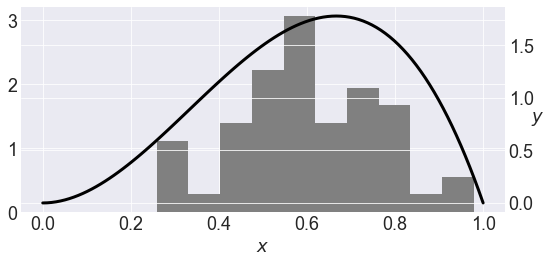

In [218]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
ax.hist(xsamples, density=True, color='gray')

ax2 = ax.twinx()
ax2.plot(
    np.linspace(0, 1, 100), rv.pdf(np.linspace(0, 1, 100)), lw=3, color='k')

ax.set_xlabel('$x$')
ax2.set_ylabel(r'$y$', rotation='horizontal')

fig.tight_layout()

<!-- dom:FIGURE: [fig-statistics/Bootstrap_001.png, width=500 frac=0.85] The $\beta(3,2)$ distribution and the histogram that approximates it. <div id="fig:Bootstrap_001"></div> -->
<!-- begin figure -->
<div id="fig:Bootstrap_001"></div>

<p>The $\beta(3,2)$ distribution and the histogram that approximates it.</p>
<img src="fig-statistics/Bootstrap_001.png" width=500>

<!-- end figure -->


[Figure](#fig:Bootstrap_001) shows the $\beta(3,2)$ distribution and
the corresponding histogram of the samples. The histogram represents
$\hat{F}$ and is the distribution we sample from to obtain the
bootstrap samples. As shown, the $\hat{F}$ is a pretty crude estimate
for the $F$ density (smooth solid line), but that's not a serious
problem insofar as the following bootstrap estimates are concerned.
In fact, the approximation $\hat{F}$ has a naturally tendency to
pull towards where most of the probability mass is. This is a
feature, not a bug; and is the underlying mechanism for why
bootstrapping works, but the formal proofs that exploit this basic
idea are far out of our scope here.  The next block generates the
bootstrap samples

In [223]:
yboot = np.random.choice(xsamples,(100,50))
yboot_mn = yboot.mean()

In [225]:
yboot_mn,3/5.

(0.6038084619330574, 0.6)

 and the bootstrap estimate is therefore,

In [232]:
np.std(yboot.mean(axis=1)),np.sqrt(1/1250) # approx sqrt(1/1250)

(0.021634845528494737, 0.0282842712474619)

 [Figure](#fig:Bootstrap_002) shows the distribution of computed
sample means from the bootstrap samples.  As promised, the next block
shows how to use `sympy.stats` to compute the $\beta(3,2)$ parameters we quoted
earlier.

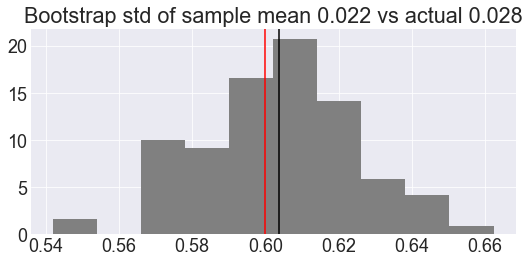

In [240]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

ax.hist(yboot.mean(axis=1), density=True, color='gray')
ax.set_title('Bootstrap std of sample mean %3.3f vs actual %3.3f' %
             (np.std(yboot.mean(axis=1)), np.sqrt(1 / 1250.)))

ax.axvline(yboot_mn,label='Bootstraped mean',color='k')
ax.axvline(3/5.,label='Actual mean',color='red'),

fig.tight_layout()

<!-- dom:FIGURE: [fig-statistics/Bootstrap_002.png, width=500 frac=0.85] For each bootstrap draw, we compute the sample mean. This is the histogram of those sample means that will be used to compute the bootstrap estimate of the standard deviation. <div id="fig:Bootstrap_002"></div> -->
<!-- begin figure -->
<div id="fig:Bootstrap_002"></div>

<p>For each bootstrap draw, we compute the sample mean. This is the histogram of those sample means that will be used to compute the bootstrap estimate of the standard deviation.</p>
<img src="fig-statistics/Bootstrap_002.png" width=500>

<!-- end figure -->

In [262]:
sample_mean_1.evalf()

0.600000000000000

In [263]:
for i in range(50): # 50 samples
    # load sympy.stats Beta random variables
    # into global namespace using exec
    execstring = "x%d = S.stats.Beta('x'+str(%d),3,2)"%(i,i)
    exec(execstring) 

# populate xlist with the sympy.stats random variables
# from above
xlist = [eval('x%d'%(i)) for i in range(50)]

# compute sample mean
sample_mean = sum(xlist)/len(xlist)
# compute expectation of sample mean
sample_mean_1 = S.stats.E(sample_mean)
# compute 2nd moment of sample mean
sample_mean_2 = S.stats.E(S.expand(sample_mean**2))
# standard deviation of sample mean
# use sympy sqrt function
sigma_smn = S.sqrt(sample_mean_2-sample_mean_1**2) # 1/sqrt(1250)
print(sigma_smn)

sqrt(-1/(20000*beta(3, 2)**2) + 1/(1500*beta(3, 2)))


In [265]:
sigma_smn.evalf(),1/np.sqrt(1250)

(0.0282842712474619, 0.0282842712474619)

**Programming Tip.**

Using the `exec` function enables the creation of a sequence of Sympy
random variables. Sympy has the `var` function which can automatically
create a sequence of Sympy symbols, but there is no corresponding
function in the statistics module to do this for random variables.



<!-- @@@CODE src-statistics/Bootstrap.py from-to:^import sympy as S@^print sigma_smn -->

<!-- p.505 casella -->

**Example.** Recall the delta method from the section.  Suppose we have a set of Bernoulli coin-flips
($X_i$) with probability of head $p$. Our maximum likelihood estimator
of $p$ is $\hat{p}=\sum X_i/n$ for $n$ flips.  We know this estimator
is unbiased with $\mathbb{E}(\hat{p})=p$ and $\mathbb{V}(\hat{p}) =
p(1-p)/n$. Suppose we want to use the data to estimate the of variance variance of
the Bernoulli trials ($\mathbb{V}(X) = p(1-p)$). By the notation the
delta method, $g(x) = x(1-x)$. By the plug-in principle, our maximum
likelihood estimator of this variance is then $\hat{p}(1-\hat{p})$. We
want the variance of this quantity.  Using the results of the delta
method, we have

$$
\mathbb{V}(g(X)) = g'(\mathbb{E}(g(X)))^2 \mathbb{V}(X)
$$

$$
\begin{align*}
\mathbb{V}(g(\hat{p})) &=(1-2\hat{p})^2\mathbb{V}(\hat{p})  \\\
\mathbb{V}(g(\hat{p})) &=(1-2\hat{p})^2\frac{\hat{p}(1-\hat{p})}{n} \\\
\end{align*}
$$

 Let's see how useful this is with a short simulation.

In [299]:
p = 0.25  # true head-up probability
x = stats.bernoulli(p).rvs(15)
x

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

 The maximum likelihood estimator of $p$ is $\hat{p}=\sum X_i/n$,

In [300]:
phat = x.mean()
phat

0.2

 Then, plugging this into the delta method approximant above,

In [301]:
((1-2*phat)**2)*(phat*(1-phat))/10.

0.005760000000000001

 Now, let's try this using the bootstrap estimate of the variance

In [321]:
phat_b = np.random.choice(x, (50, 15)).mean(1)
np.var(phat_b * (1 - phat_b))

0.004001943703703704

 This shows that the delta method's estimated variance
is different from the bootstrap method, but which one is better?
For this situation we can solve for this directly using Sympy

In [252]:
xdata = [S.stats.Bernoulli(i, p) for i in S.symbols('x:10')]
ph = sum(xdata) / float(len(xdata))
g = ph * (1 - ph)

**Programming Tip.**

The argument in the `S.symbols('x:10')` function returns a sequence of Sympy
symbols named `x1,x2` and so on. This is shorthand for creating and naming each
symbol sequentially.



 Note that `g` is the $g(\hat{p})=\hat{p}(1- \hat{p})$ 
whose variance we are trying to estimate. Then,
we can plug in for the estimated $\hat{p}$ and get the correct
value for the variance,

In [253]:
S.stats.E(g**2) - S.stats.E(g)**2

0.00442968750000000

 This case is generally representative --- the delta method tends
to underestimate the variance and the bootstrap estimate is better here.


## Parametric Bootstrap

In the previous example, we used the $\lbrace x_1, x_2, \ldots, x_n \rbrace $
samples themselves as the basis for $\hat{F}$ by weighting each with $1/n$. An
alternative is to *assume* that the samples come from a particular
distribution, estimate the parameters of that distribution from the sample set,
and then use the bootstrap mechanism to draw samples from the assumed
distribution, using the so-derived parameters. For example, the next code block
does this for a normal distribution.

In [342]:
rv = stats.norm(0,2)
xsamples = rv.rvs(100)

# estimate mean and var from xsamples
mn_ = np.mean(xsamples)
std_ = np.std(xsamples)

# bootstrap from assumed normal distribution with
# mn_,std_ as parameters
rvb = stats.norm(mn_,std_) #plug-in distribution

yboot = rvb.rvs(10000)

<!-- @@@CODE src-statistics/Bootstrap.py from-to:^# In\[7\]:@^yboot -->

 Recall the sample variance estimator is the following:

$$
S^2 = \frac{1}{n-1} \sum (X_i-\bar{X})^2
$$

 Assuming that the samples are normally distributed, this
means that $(n-1)S^2/\sigma^2$ has a chi-squared distribution with
$n-1$ degrees of freedom. Thus, the variance, $\mathbb{V}(S^2) = 2
\sigma^4/(n-1) $. Likewise, the MLE plug-in estimate for this is
$\mathbb{V}(S^2) = 2 \hat{\sigma}^4/(n-1)$ The following code computes
the variance of the sample variance, $S^2$ using the MLE and bootstrap
methods.

In [343]:
# MLE-Plugin Variance of the sample mean 
print(2*(std_**2)**2/9.) # MLE plugin
# Bootstrap variance of the sample mean 
print(yboot.var())
# True variance of sample mean 
print(2*(2**2)**2/9.)

2.5832320859357787
3.403564361107094
3.5555555555555554


<!-- @@@CODE src-statistics/Bootstrap.py from-to:^# In\[8\]:@^# end8 -->

 This shows that the bootstrap estimate is better here than the MLE
plugin estimate.

Note that this technique becomes even more powerful with multivariate
distributions with many parameters because all the mechanics are the same.
Thus, the bootstrap is a great all-purpose method for computing standard
errors, but, in the limit,  is it converging to the correct value? This is the
question of *consistency*. Unfortunately, to answer this question requires more
and deeper mathematics than we can get into here.  The short answer is that for
estimating standard errors, the bootstrap is a consistent estimator in a wide
range of cases and so it definitely belongs in your toolkit.

## Gauss-Markov theorem


[wiki]

Suppose we have in matrix notation,
$$\underline{y} = X \underline{\beta} + \underline{\varepsilon},\quad (\underline{y},\underline{\varepsilon} \in \mathbb{R}^n, \underline{\beta} \in \mathbb{R}^K \text{ and } X\in\mathbb{R}^{n\times K})$$
expanding to,
$$y_i=\sum_{j=1}^{K}\beta_j X_{ij}+\varepsilon_i \quad \forall i=1,2,\ldots,n$$

where $\beta_j$ are non-random but **unobservable** parameters, $X_{ij}$ 
are non-random and observable (called the "explanatory variables"), $\varepsilon_i$ are random, and so $y_i$ are random. The random variables $\varepsilon_i$ are called the "disturbance", "noise" or simply "error" (will be contrasted with "residual" later in the article;]). Note that to include a constant in the model above, one can choose to introduce the constant as a variable $\beta_{K+1}$  with a newly introduced last column of X being unity i.e., $X_{i(K+1)} = 1$ for all $ i $.

The **Gauss–Markov** assumptions concern the set of error random variables, $\varepsilon_i$:

- They have mean zero: $\operatorname{E}[\varepsilon_i]=0.$
- They are homoscedastic, that is all have the same finite variance: $\operatorname{Var}(\varepsilon_i)= \sigma^2 < \infty,$ and 
- Distinct error terms are uncorrelated: $\text{Cov}(\varepsilon_i,\varepsilon_j) = 0, \forall i \neq j.$

A **linear estimator** of $ \beta_j  $ is a linear combination

$$\widehat\beta_j = c_{1j}y_1+\cdots+c_{nj}y_n$$

in which the coefficients $ c_{ij} $  are not allowed to depend on the underlying coefficients $\beta_j$, since those are not observable, but are allowed to depend on the values $ X_{ij} $, since these data are observable.  (The dependence of the coefficients on each $X_{ij}$ is typically nonlinear; the estimator is linear in each $ y_i $ and hence in each random $ \varepsilon,$ which is why this is "linear" regression.)  The estimator is said to be **unbiased** if and only if

$$\operatorname{E}\left [\widehat\beta_j \right ]=\beta_j$$

regardless of the values of $ X_{ij} $. Now, let $\sum\nolimits_{j=1}^K\lambda_j\beta_j$ be some linear combination of the coefficients. Then the **mean squared error** of the corresponding estimation is

$$\operatorname{E} \left [\left(\sum_{j=1}^K\lambda_j \left (\widehat\beta_j-\beta_j \right )\right)^2\right ],$$

in other words it is the expectation of the square of the weighted sum (across parameters) of the differences between the estimators and the corresponding parameters to be estimated.  (Since we are considering the case in which all the parameter estimates are unbiased, this mean squared error is the same as the variance of the linear combination.) The **best linear unbiased estimator** (BLUE) of the vector $ \beta $  of parameters $ \beta_j $  is one with the smallest mean squared error for every vector $ \lambda $ of linear combination parameters.  This is equivalent to the condition that

$$\operatorname{Var}\left(\widetilde\beta\right)- \operatorname{Var} \left( \widehat \beta \right)$$

is a positive semi-definite matrix for every other linear unbiased estimator $\widetilde\beta$.

The **ordinary least squares estimator (OLS)** is the function

$$\widehat\beta=(X'X)^{-1}X'y$$

of $ y $ and $X$ (where $X'$ denotes the transpose of $ X $) that minimizes the **sum of squares of errors and residuals in statistics|residuals** (misprediction amounts):

$$\sum_{i=1}^n \left(y_i-\widehat{y}_i\right)^2=\sum_{i=1}^n \left(y_i-\sum_{j=1}^K \widehat\beta_j X_{ij}\right)^2.$$

The theorem now states that the OLS estimator is a BLUE. The main idea of the proof is that the least-squares estimator is uncorrelated with every linear unbiased estimator of zero, i.e., with every linear combination $a_1y_1+\cdots+a_ny_n$ whose coefficients do not depend upon the unobservable $ \beta $ but whose expected value is always zero.

<!-- # !bc pycod -->
<!-- # from mpl_toolkits.mplot3d import proj3d -->
<!-- # from numpy.linalg import inv -->
<!-- # import matplotlib.pyplot as plt -->
<!-- # import numpy as np -->
<!-- # from numpy import matrix, linalg, ones, array -->
<!-- # Q = np.eye(3)*.1 # error covariance matrix -->
<!-- # beta = matrix(ones((2,1))) # this is what we are trying estimate -->
<!-- # W = matrix([[1,2], -->
<!-- #             [2,3], -->
<!-- #             [1,1]]) -->
<!-- # ntrials = 50 -->
<!-- # epsilon = np.random.multivariate_normal((0,0,0),Q,ntrials).T -->
<!-- # y=W*beta+epsilon -->
<!-- # -->
<!-- # K=inv(W.T*inv(Q)*W)*matrix(W.T)*inv(Q) -->
<!-- # b=K*y #estimated beta from data -->
<!-- # -->
<!-- # fig = plt.figure() -->
<!-- # fig.set_size_inches([6,6]) -->
<!-- # -->
<!-- # # some convenience definitions for plotting -->
<!-- # bb = array(b) -->
<!-- # bm = bb.mean(1) -->
<!-- # yy = array(y) -->
<!-- # ax = fig.add_subplot(111, projection='3d') -->
<!-- # -->
<!-- # ax.plot3D(yy[0,:],yy[1,:],yy[2,:],'mo',label='y',alpha=0.3) -->
<!-- # ax.plot3D([beta[0,0],0],[beta[1,0],0],[0,0],'r-',label=r'$\beta$') -->
<!-- # ax.plot3D([bm[0],0],[bm[1],0],[0,0],'g-',lw=1,label=r'$\widehat{\beta}_m$') -->
<!-- # ax.plot3D(bb[0,:],bb[1,:],0*bb[1,:],'.g',alpha=0.5,lw=3,label=r'$\hat{\beta}$') -->
<!-- # ax.legend(loc=0,fontsize=18) -->
<!-- # plt.show() -->
<!-- # !ec -->

<!-- dom:FIGURE: [fig-statistics/Gauss_Markov_001.png, width=500 frac=0.85] The red circles show the points to be estimated in the *xy*-plane by the black points. <div id="fig:Gauss_Markov_001"></div> -->
<!-- begin figure -->
<div id="fig:Gauss_Markov_001"></div>

<p>The red circles show the points to be estimated in the <em>xy</em>-plane by the black points.</p>
<img src="fig-statistics/Gauss_Markov_001.png" width=500>

<!-- end figure -->


[Figure](#fig:Gauss_Markov_001) shows the simulated $\mathbf{y}$ data as red
circles. The black dots show the corresponding estimates,
$\boldsymbol{\hat{\beta}}$ for each sample. The black lines show the true value
of $\boldsymbol{\beta}$ versus the average of the estimated
$\boldsymbol{\beta}$-values, $\widehat{\boldsymbol{\beta}_m}$. The matrix
$\mathbf{K}$ maps the red circles in the corresponding dots. Note there are
many possible ways to map the red circles to the plane, but the $\mathbf{K}$ is
the one that minimizes the MSE for $\boldsymbol{\beta}$. 

<!-- dom:FIGURE: [fig-statistics/Gauss_Markov_002.png, width=500 frac=0.85] Focusing on the *xy*-plane in [Figure](#fig:Gauss_Markov_001), the dashed line shows the true value for $\boldsymbol{\beta}$ versus the mean of the estimated values $\widehat{\boldsymbol{\beta}}_m$. <div id="fig:Gauss_Markov_002"></div> -->
<!-- begin figure -->
<div id="fig:Gauss_Markov_002"></div>

<p>Focusing on the <em>xy</em>-plane in [Figure](#fig:Gauss_Markov_001), the dashed line shows the true value for $\boldsymbol{\beta}$ versus the mean of the estimated values $\widehat{\boldsymbol{\beta}}_m$.</p>
<img src="fig-statistics/Gauss_Markov_002.png" width=500>

<!-- end figure -->


[Figure](#fig:Gauss_Markov_002) shows more detail in the horizontal *xy*-plane
of [Figure](#fig:Gauss_Markov_001).  [Figure](#fig:Gauss_Markov_002) shows
the dots, which are individual estimates of $\boldsymbol{\hat{\beta}}$ from the
corresponding simulated $\mathbf{y}$ data. The dashed line is the true value
for $\boldsymbol{\beta}$ and the filled line ($\widehat{\boldsymbol{\beta}}_m$)
is the average of all the dots.  The gray ellipse provides an error ellipse
for the covariance of the estimated $\boldsymbol{\beta}$ values.  